1. Préparation des données et augmentation

In [4]:
# Importations nécessaires
from google.colab import drive
import os
import zipfile
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [5]:
# 1. Monter Google Drive
drive.mount('/content/drive')

# 2. Définir les chemins
drive_zip_path = '/content/drive/MyDrive/Dogs vs Cats.zip'  # Chemin dans Drive
extract_path = '/content/cats_and_dogs'
original_train_dir = os.path.join(extract_path, 'train/train')  # Adapté à la structure réelle
processed_train_dir = os.path.join(extract_path, 'processed_train')
validation_dir = os.path.join(extract_path, 'validation')

# 3. Nettoyage initial et création des dossiers
!rm -rf {extract_path}  # Suppression complète avant extraction
os.makedirs(extract_path, exist_ok=True)

# 4. Copie depuis Drive vers Colab
!cp "{drive_zip_path}" "{extract_path}/Dogs_vs_Cats.zip"

# 5. Extraction
with zipfile.ZipFile(os.path.join(extract_path, 'Dogs_vs_Cats.zip'), 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# 6. Vérification de la structure
print("Structure après extraction:")
!find {extract_path} -type d | sort
print("\nContenu du dossier train/train:")
!ls -la {original_train_dir} | head -10

# 7. Fonction pour organiser les fichiers
def organize_images(source_dir, train_dest, val_dest, test_size=0.2):
    """Organise les images en train/validation avec séparation par classe"""
    os.makedirs(train_dest, exist_ok=True)
    os.makedirs(val_dest, exist_ok=True)

    # Créer sous-dossiers cats/dogs
    for folder in [train_dest, val_dest]:
        for class_name in ['cats', 'dogs']:
            os.makedirs(os.path.join(folder, class_name), exist_ok=True)

    # Lister les fichiers images
    all_files = [f for f in os.listdir(source_dir)
                if os.path.isfile(os.path.join(source_dir, f))
                and f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    if not all_files:
        raise ValueError(f"Aucune image trouvée dans {source_dir}")

    # Séparation train/validation
    train_files, val_files = train_test_split(all_files, test_size=test_size, random_state=42)

    # Déplacement des fichiers
    for file_list, dest in [(train_files, train_dest), (val_files, val_dest)]:
        for file in file_list:
            src = os.path.join(source_dir, file)
            class_folder = 'cats' if 'cat' in file.lower() else 'dogs'
            dst = os.path.join(dest, class_folder, file)
            shutil.move(src, dst)

# 8. Organiser les images
organize_images(
    source_dir=original_train_dir,
    train_dest=processed_train_dir,
    val_dest=validation_dir,
    test_size=0.2
)

# 9. Vérification après organisation
print("\nStructure après organisation:")
!find {extract_path} -type d | sort
print("\nContenu de processed_train:")
!ls -la {processed_train_dir} | head -10
print("\nContenu de validation:")
!ls -la {validation_dir} | head -10

# 10. Paramètres des images
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32
EPOCHS = 15

# 11. Augmentation des données
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# 12. Création des générateurs
train_generator = train_datagen.flow_from_directory(
    processed_train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 13. Affichage des informations
print("\nClasses d'entraînement:", train_generator.class_indices)
print("Nombre d'images d'entraînement:", train_generator.samples)
print("Nombre d'images de validation:", validation_generator.samples)

Mounted at /content/drive
Structure après extraction:
/content/cats_and_dogs
/content/cats_and_dogs/test
/content/cats_and_dogs/test/test
/content/cats_and_dogs/train
/content/cats_and_dogs/train/train

Contenu du dossier train/train:
total 609268
drwxr-xr-x 2 root root 774144 Jul 11 17:02 .
drwxr-xr-x 3 root root   4096 Jul 11 17:01 ..
-rw-r--r-- 1 root root  12414 Jul 11 17:01 cat.0.jpg
-rw-r--r-- 1 root root  21944 Jul 11 17:01 cat.10000.jpg
-rw-r--r-- 1 root root  27322 Jul 11 17:01 cat.10001.jpg
-rw-r--r-- 1 root root  25723 Jul 11 17:01 cat.10002.jpg
-rw-r--r-- 1 root root  28035 Jul 11 17:01 cat.10003.jpg
-rw-r--r-- 1 root root  12973 Jul 11 17:01 cat.10004.jpg
-rw-r--r-- 1 root root   8245 Jul 11 17:01 cat.10005.jpg

Structure après organisation:
/content/cats_and_dogs
/content/cats_and_dogs/processed_train
/content/cats_and_dogs/processed_train/cats
/content/cats_and_dogs/processed_train/dogs
/content/cats_and_dogs/test
/content/cats_and_dogs/test/test
/content/cats_and_dogs/t

Préparer les images de chiens et de chats pour pouvoir les utiliser dans un modèle de deep learning. Cela comprend :

    Monter Google Drive

    Extraire un fichier .zip

    Organiser les images dans des dossiers adaptés à l'entraînement (train/validation)

Ce que fait le code :

    Monte Google Drive pour accéder au fichier Dogs vs Cats.zip

    Copie ce fichier dans l’environnement local Colab

    Décompresse les images (environ 25 000 photos)

    Sépare les images en 2 classes (dog et cat) selon leur nom de fichier (cat.123.jpg, dog.456.jpg)

    Crée deux jeux :

        Entraînement (80%)

        Validation (20%)

Est-ce que c’est bien ?
La méthode est correcte et propre :

    Le train_test_split de Scikit-learn est bien utilisé avec un random_state pour la reproductibilité.

    L’organisation en dossiers processed_train/cat, processed_train/dog, validation/cat, validation/dog est compatible avec ImageDataGenerator.flow_from_directory() de Keras.

2. Construction du modèle CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)


Créer des variations artificielles des images (zoom, rotation, etc.) pour éviter le sur-apprentissage (overfitting) et améliorer la généralisation du modèle.

Applique des transformations comme :

        rotation de ±40°

        zoom jusqu’à 20%

        translation horizontale/verticale (20%)

        retournement horizontal

Crée deux objets ImageDataGenerator :

        un pour l’entraînement (avec augmentation)

        un pour la validation (sans augmentation, juste redimensionnement)

L’augmentation n’est appliquée qu’à l'entraînement, pas à la validation (bonne pratique).

La taille des images est normalisée à 150x150, ce qui est suffisant pour un modèle léger.

3. Entraînement du modèle

In [ ]:
epochs = 15

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - accuracy: 0.5407 - loss: 0.7205

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 154s 237ms/step - accuracy: 0.5408 - loss: 0.7204 - val_accuracy: 0.6713 - val_loss: 0.6230
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 195s 234ms/step - accuracy: 0.6495 - loss: 0.6202 - val_accuracy: 0.7214 - val_loss: 0.5429
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 233ms/step - accuracy: 0.6904 - loss: 0.5777 - val_accuracy: 0.7550 - val_loss: 0.5076
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 230ms/step - accuracy: 0.7104 - loss: 0.5533 - val_accuracy: 0.7710 - val_loss: 0.4782
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 328ms/step - accuracy: 0.7417 - loss: 0.5256 - val_accuracy: 0.7913 - val_loss: 0.4489
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 207s 240ms/step - accuracy: 0.7347 - loss: 0.5238 - val_accuracy: 0.7945 - val_loss: 0.4557
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.7557 - loss: 0.4926 - val_accuracy: 0.8137 - val_loss: 0.4175
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 237ms/step - accuracy: 0.7742 - loss: 0.47

But : Créer un modèle de réseau de neurones convolutifs (CNN) pour classer les images en chien ou chat.

Ce que fait le code (architecture CNN typique) :

    3 blocs convolutionnels + max pooling (extraction de caractéristiques)

    Flatten → Dense(512) → Dropout(0.5) → Dense(1, activation sigmoid)

    Compile avec :

        perte binary_crossentropy (car binaire)

        optimiseur RMSprop

        métrique accuracy


    Le Dropout aide à réduire le sur-apprentissage

    L’architecture est simple, adaptée à un petit dataset

    RMSprop est un bon choix par défaut pour ce type de données

4. Évaluation du modèle

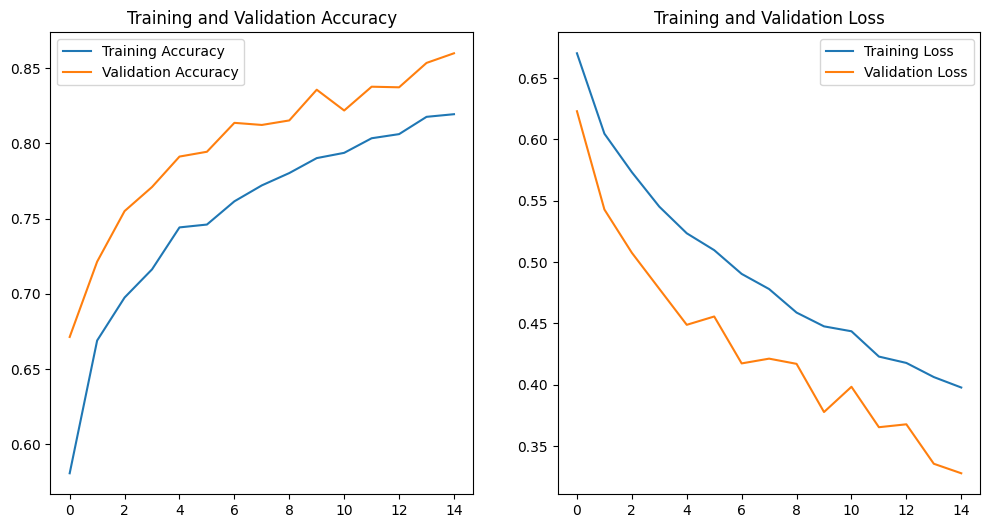

In [ ]:
# Visualisation des courbes d'apprentissage
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

 Ce que fait le code :

    Entraîne le modèle pendant 30 epochs

    Utilise les générateurs d’images avec batch size de 20

    Affiche les courbes d'entraînement/validation pour :

        la perte (loss)

        la précision (accuracy)

1. Courbes d’Accuracy (gauche)

    Axe horizontal (epochs) : de 0 à 14 (soit 15 passes sur tout le jeu d’entraînement).

    Courbe bleue (Training Accuracy) : précision mesurée sur le jeu d’entraînement.

    Courbe orange (Validation Accuracy) : précision mesurée sur le jeu de validation (images non vues pendant l’entraînement).

Tendances observées

    Progression linéaire des deux courbes : elles montent toutes les deux régulièrement au fil des epochs.

    Validation toujours au‑dessus de l’entraînement (à quelques oscillations près) :

        Autour de l’epoch 0, val_acc ≈ 0.67 vs train_acc ≈ 0.58

        En fin d’entraînement (epoch 14), val_acc ≈ 0.86 vs train_acc ≈ 0.82

Pourquoi c’est bon signe

    Le fait que la validation reste plus élevée que l’entraînement est inhabituel, mais ici il s’explique par la data augmentation :

        Le générateur d’entraînement produit des images déformées (rotation, zoom, translation) qui sont plus difficiles à classer, ce qui fait légèrement baisser train_acc.

        Le jeu de validation, non augmenté, est plus “propre”, d’où une val_acc souvent supérieure.

    Aucune divergence excessive entre train_acc et val_acc : si tu avais un surapprentissage, tu verrais train_acc → 1.0 tandis que val_acc stagne ou redescend.

    L’accuracy finale (≈ 82 % train, 86 % val) montre un apprentissage solide sans trop de biais.

2. Courbes de Loss (droite)

    Loss = “erreur” mesurée par la fonction binary_crossentropy.

    Courbe bleue (Training Loss) : erreur moyenne sur le jeu d’entraînement.

    Courbe orange (Validation Loss) : erreur moyenne sur le jeu de validation.

Tendances observées

    Décroissance régulière de la loss pour les deux jeux :

        Training loss descend de ≈ 0.67 à ≈ 0.40

        Validation loss descend de ≈ 0.62 à ≈ 0.33

    Petites oscillations (notamment vers les epochs 5–6 et 9–10) :

        Ce sont simplement des variations liées à l’augmentation aléatoire des données.


5. Bonus: Visualisation de l'augmentation des données

Found 20000 images belonging to 2 classes.

✅ Générateur créé avec succès. 20000 images trouvées.
Classes détectées: {'cats': 0, 'dogs': 1}

Visualisation des images augmentées:


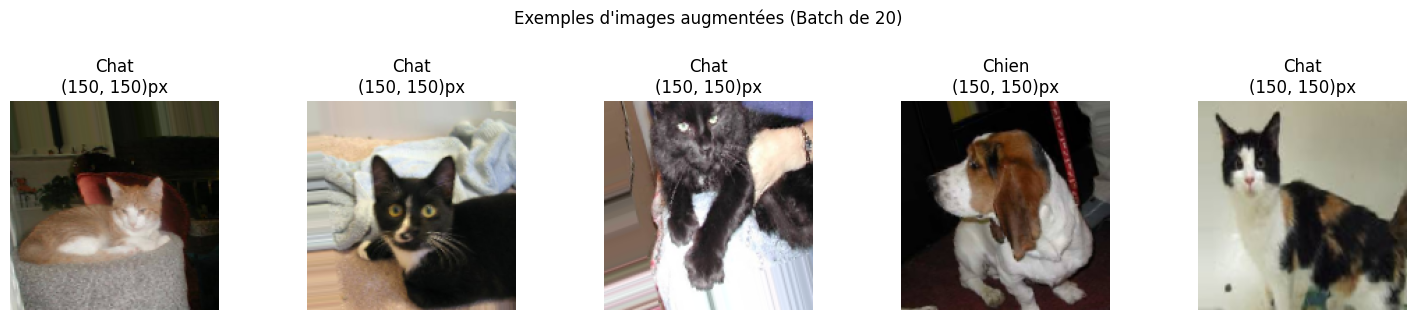

Forme des images: (150, 150, 3)
Plage des valeurs: 0.00 - 0.93

Vérification des sous-dossiers:
total 225284
drwxr-xr-x 2 root root 303104 Jul 11 17:02 .
drwxr-xr-x 4 root root   4096 Jul 11 17:02 ..
total 263496
drwxr-xr-x 2 root root 278528 Jul 11 17:02 .
drwxr-xr-x 4 root root   4096 Jul 11 17:02 ..


In [7]:
# 1. Création du générateur avec augmentation (identique à votre configuration originale)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 2. Configuration du chemin des données - VERSION CORRIGÉE
# Utilisation du chemin absolu et vérification
train_dir = '/content/cats_and_dogs/processed_train'

# Vérification que le dossier existe
if not os.path.exists(train_dir):
    raise FileNotFoundError(
        f"Le dossier {train_dir} n'existe pas. "
        f"Vérifiez que vous avez bien exécuté les étapes précédentes d'organisation des images.\n"
        f"Contenu de /content/cats_and_dogs: {os.listdir('/content/cats_and_dogs')}"
    )

# 3. Création du générateur - VERSION SÉCURISÉE
try:
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary',
        shuffle=True  # Important pour l'augmentation
    )

    # Vérification que des images ont été trouvées
    if train_generator.samples == 0:
        raise ValueError("Aucune image trouvée dans le dossier. Vérifiez la structure des sous-dossiers (cats/dogs).")

    print(f"\n✅ Générateur créé avec succès. {train_generator.samples} images trouvées.")
    print(f"Classes détectées: {train_generator.class_indices}")

except Exception as e:
    print(f"\n❌ Erreur lors de la création du générateur: {str(e)}")
    print("Vérifiez que:")
    print(f"1. Le dossier {train_dir} existe bien")
    print("2. Il contient des sous-dossiers 'cats' et 'dogs'")
    print("3. Ces sous-dossiers contiennent des images valides")
    print(f"Contenu actuel: {os.listdir(train_dir)}")
    raise

# 4. Fonction de visualisation - VERSION AMÉLIORÉE
def plot_augmented_images(image_generator, n_images=5):
    """
    Visualise un batch d'images après augmentation de données.

    Args:
        image_generator (DirectoryIterator): Générateur Keras valide
        n_images (int): Nombre d'images à afficher (max 5 recommandé)
    """
    try:
        # Réinitialisation du générateur pour éviter les biais
        image_generator.reset()

        # Récupération d'un batch
        batch = next(image_generator)
        images, labels = batch[0][:n_images], batch[1][:n_images]

        # Configuration du plot
        plt.figure(figsize=(15, 3))
        plt.suptitle(f"Exemples d'images augmentées (Batch de {image_generator.batch_size})",
                    fontsize=12, y=1.05)

        # Affichage des images
        for i, (img, label) in enumerate(zip(images, labels)):
            plt.subplot(1, n_images, i+1)
            plt.imshow(img)
            plt.title(f"{'Chat' if label < 0.5 else 'Chien'}\n{img.shape[:2]}px")
            plt.axis('off')

        plt.tight_layout()
        plt.show()

        # Information supplémentaire
        print(f"Forme des images: {images[0].shape}")
        print(f"Plage des valeurs: {images[0].min():.2f} - {images[0].max():.2f}")

    except Exception as e:
        print(f"\n⚠️ Erreur lors de la visualisation: {str(e)}")
        if 'image_generator' in locals():
            print(f"État du générateur: {image_generator.samples} images | {image_generator.batch_size} par batch")
        raise

# 5. Exécution sécurisée
if 'train_generator' in locals() and train_generator.samples > 0:
    try:
        print("\nVisualisation des images augmentées:")
        plot_augmented_images(train_generator)

        # Affichage supplémentaire pour vérification
        print("\nVérification des sous-dossiers:")
        !ls -la {train_dir}/cats | head -3
        !ls -la {train_dir}/dogs | head -3

    except Exception as e:
        print(f"Erreur lors de la visualisation: {str(e)}")
else:
    print("Impossible de visualiser: le générateur n'est pas correctement initialisé.")

Afficher les prédictions du modèle sur quelques images de validation pour vérifier qualitativement.

Ce que fait le code :

    Charge aléatoirement des images de validation

    Prédit leur classe avec model.predict()

    Affiche l’image avec la prédiction (« cat » ou « dog »)

Oui, c’est essentiel pour juger si le modèle se comporte bien même sans chiffres.

    Ça permet de voir s’il fait des erreurs grossières

    Utile pour juger visuellement la cohérence